In [1]:
import pandas as pd
from PIL import Image
import os

input_csv = "/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/PortraitResultsForCF/Aubry, Peter II/common_label_percentage.csv"
base_input_dir = "/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/Artstyle/correct_classification_exp&newimg/Aubry, Peter II"
output_dir = "/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/Artstyle/correct_classification_exp&newimg/collagemaker/Aubry, Peter II"

os.makedirs(output_dir, exist_ok=True)

# Read CSV file
df = pd.read_csv(input_csv)

for _, row in df.iterrows():
    file_name = row['file_name']
    file_name = file_name.replace("Input", "Comparison")

    file_name_path = os.path.join(base_input_dir, file_name)

    if os.path.exists(file_name_path):
        with Image.open(file_name_path) as img:
            # Optional: show image
            # img.show()

            # Save using original file name (without replacing it with object)
            output_path = os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.png")
            img.save(output_path)
            print(f"Saved: {output_path}")
    else:
        print(f"File not found: {file_name_path}")


ParserError: Error tokenizing data. C error: Expected 9 fields in line 11, saw 15


Comparison_azaleas.jpg.png


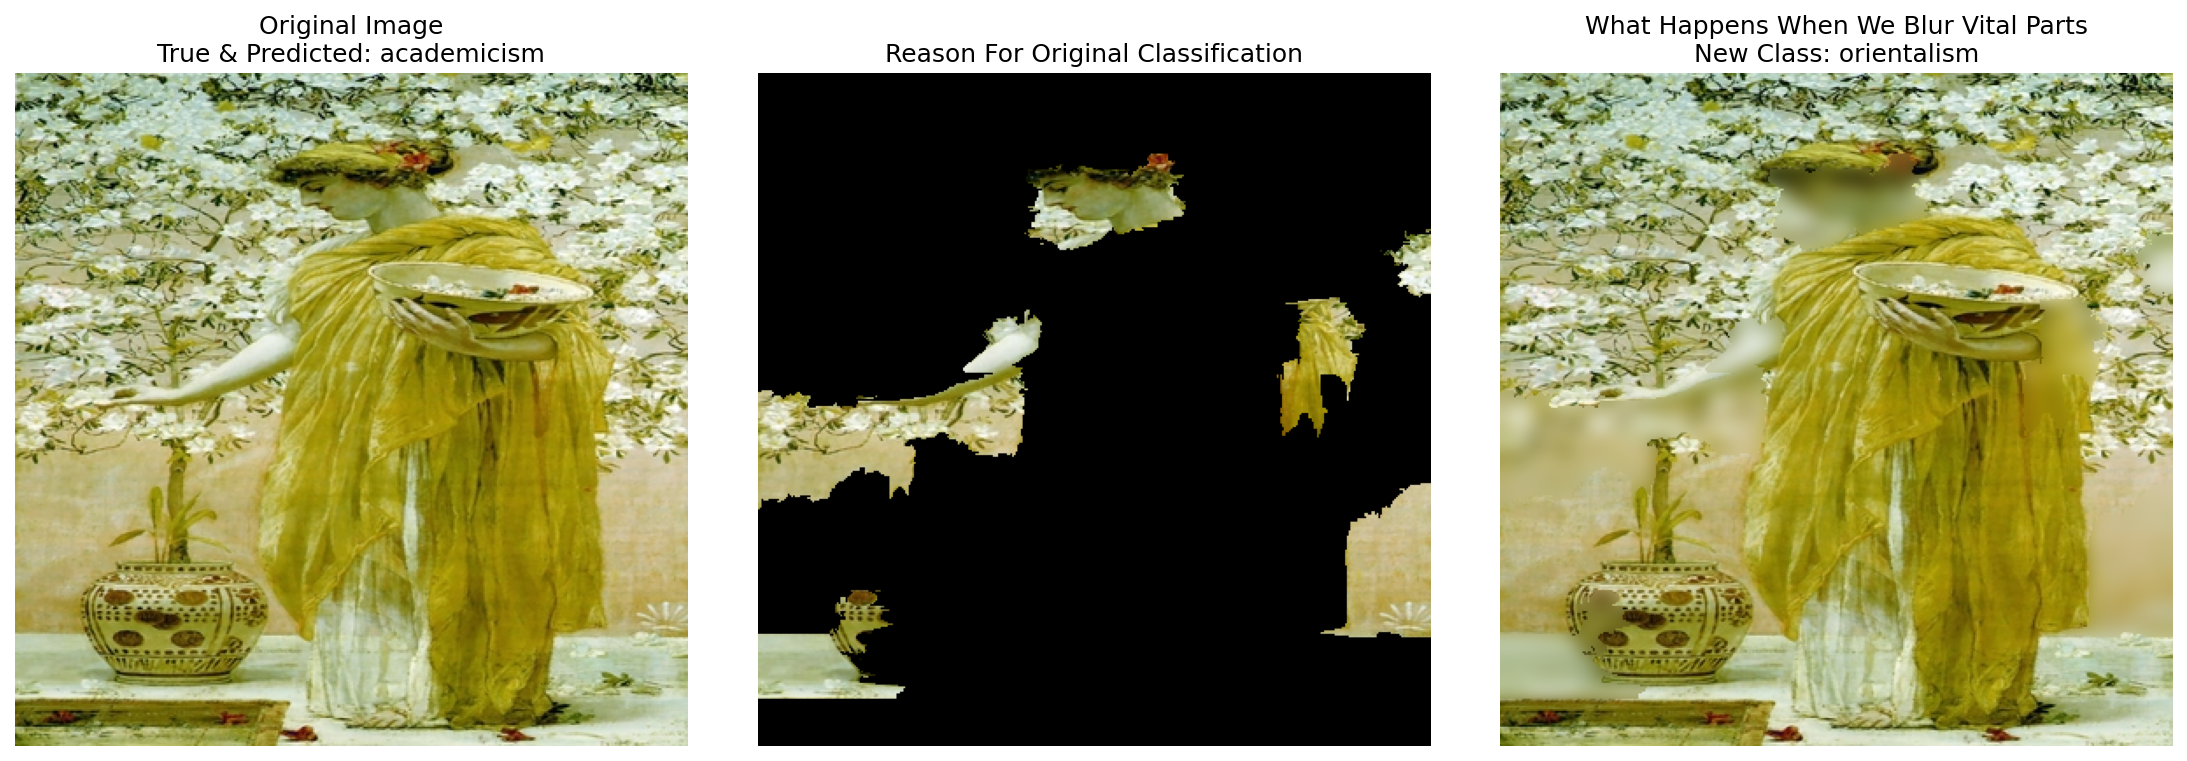

/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/Artstyle/correct_classification_exp&newimg/academicism/Comparison_azaleas.jpg.png


FileNotFoundError: [Errno 2] No such file or directory: '/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/academicism/Reason_Comparison_azaleas.jpg.png'

In [93]:
import pandas as pd
from PIL import Image
import os
with open("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/academicism/cmn_extracted.txt", "r") as file:
    #print(file.read())
    for line in file:
        line_split_comma = line.split(",")
        file_name = line_split_comma[0]
        file_name = file_name.strip()
        file_name = file_name.replace("Input","Comparison")
        print(file_name)
        file_name_path = os.path.join("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/Artstyle/correct_classification_exp&newimg/academicism",file_name)
        reason_file_name = "Reason_"+str(file_name)
        reason_file_name = reason_file_name.strip()
        reason_file_name_path = os.path.join("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/academicism",reason_file_name)
        with Image.open(file_name_path) as source_file_image:
            source_file_image.show()
            print(file_name_path)
            with Image.open(reason_file_name_path) as reason_file_image:
                reason_file_image.show()


In [88]:
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os

original_labels_list = []
original_labels_with_counts = {}
evidence_labels_list = []
evidence_labels_with_counts = {}

with open("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/Ukiyo_e/cmn_lbl_shr.txt", "r") as file:
    for line in file:
        if line.startswith("Input_"):
            line_split_comma = line.split("}}")
            file_name = line_split_comma[0]
            file_name = file_name.strip()
            file_name_path = os.path.join("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/Ukiyo_e", file_name)
            reason_file_name = "Reason_" + str(file_name)
            reason_file_name = reason_file_name.strip()
            reason_file_name_path = os.path.join("/data/vifapi/ameed_ahmed_thesis/HildesheimThesis/CSWin_Transformer_main/ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/Ukiyo_e", reason_file_name)
            
            labels_parts = line.split("}}")
            before_part = labels_parts[0]
            before_part_cleansed = before_part.split("Ukiyo_e,") # ImageCounterfactualExplanations/ParallelDivision/ObjectDetectionResults/dinov3/CommonLabelPercentage/Artstyle/neoclassicism
            before_part_relevant = before_part_cleansed[1]
            original_segmentation_coverage = before_part_relevant
            original_segmentation_coverage = original_segmentation_coverage.replace("{", "").replace("}", "")
            after_part = labels_parts[1]
            print(after_part)
            after_part_cleansed = after_part.replace(",{", "").replace("}", "").replace("{", "")
            evidence_segmentation_coverage = after_part_cleansed
            
            # Extract labels from original segmentation coverage
            original_labels = re.findall(r"'name':\s*'([^']+)'", original_segmentation_coverage)
            for item in original_labels:
                original_labels_list.append(item)
                # Count directly here instead of separate loop
                original_labels_with_counts[item] = original_labels_with_counts.get(item, 0) + 1
            
            # Extract labels from evidence segmentation coverage
            evidence_labels = re.findall(r"'name':\s*'([^']+)'", evidence_segmentation_coverage)
            for item in evidence_labels:
                evidence_labels_list.append(item)
                # Count directly here instead of separate loop
                evidence_labels_with_counts[item] = evidence_labels_with_counts.get(item, 0) + 1

evidence_labels_with_counts_keys =  [key for key,_ in evidence_labels_with_counts.items()]
evidence_labels_with_counts_values = [value for _,value in evidence_labels_with_counts.items()]

,{12: {'name': 'person', 'pixel_count': 32456, 'percentage': 22.01
,{0: {'name': 'wall', 'pixel_count': 656, 'percentage': 0.44}, 2: {'name': 'sky', 'pixel_count': 19354, 'percentage': 13.13}, 12: {'name': 'person', 'pixel_count': 110, 'percentage': 0.07}, 76: {'name': 'boat', 'pixel_count': 16818, 'percentage': 11.41}, 26: {'name': 'sea', 'pixel_count': 32637, 'percentage': 22.13
,{26: {'name': 'sea', 'pixel_count': 147456, 'percentage': 100.0
,{0: {'name': 'wall', 'pixel_count': 3141, 'percentage': 2.13}, 2: {'name': 'sky', 'pixel_count': 13021, 'percentage': 8.83}, 3: {'name': 'floor', 'pixel_count': 347, 'percentage': 0.24}, 12: {'name': 'person', 'pixel_count': 10077, 'percentage': 6.83
,{3: {'name': 'floor', 'pixel_count': 7133, 'percentage': 4.84}, 132: {'name': 'person', 'pixel_count': 341, 'percentage': 0.23
,{2: {'name': 'sky', 'pixel_count': 21075, 'percentage': 14.29}, 3: {'name': 'floor', 'pixel_count': 2569, 'percentage': 1.74
,{0: {'name': 'wall', 'pixel_count': 5203, 'p

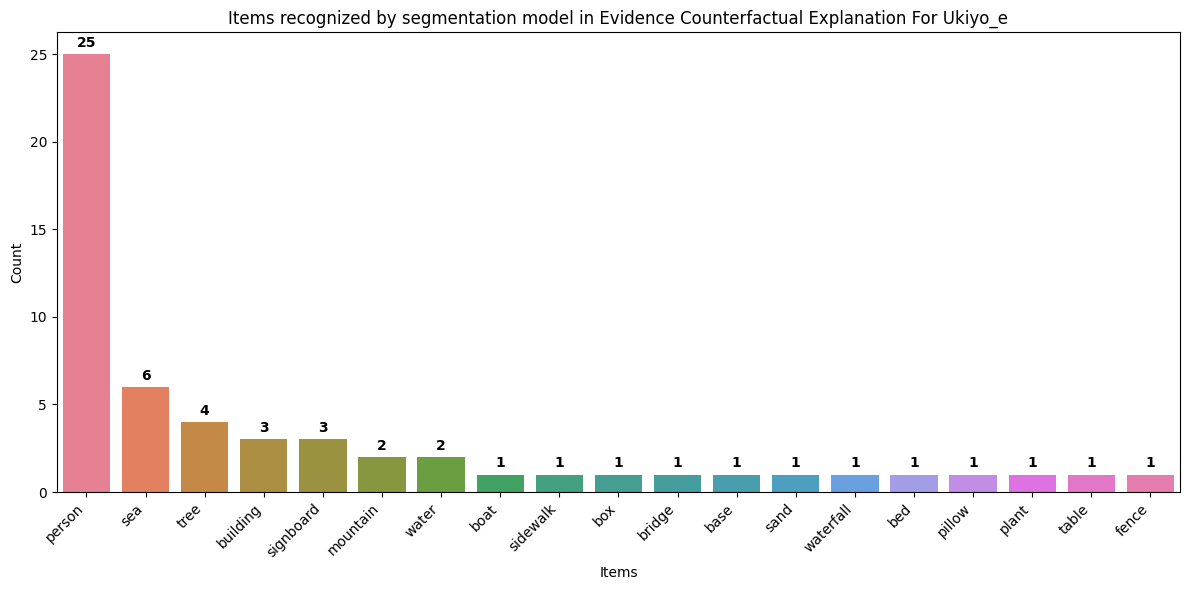

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort the data by counts in descending order
sorted_indices = np.argsort(evidence_labels_with_counts_values)[::-1]
sorted_keys = [evidence_labels_with_counts_keys[i] for i in sorted_indices if evidence_labels_with_counts_keys[i] != "wall" and evidence_labels_with_counts_keys[i] != "sky" and evidence_labels_with_counts_keys[i] != "floor"]

sorted_values = [evidence_labels_with_counts_values[i] for i in sorted_indices if evidence_labels_with_counts_keys[i] != "wall" and evidence_labels_with_counts_keys[i] != "sky" and evidence_labels_with_counts_keys[i] != "floor"]


# Increase figure width
plt.figure(figsize=(12, 6))

# Create the bar plot with sorted data
ax = sns.barplot(x=sorted_keys, y=sorted_values, hue=sorted_keys, legend=False)

# Add value labels on top of bars
for i, v in enumerate(sorted_values):
    ax.text(i, v + max(sorted_values) * 0.01, str(v), 
            ha='center', va='bottom', fontweight='bold')

plt.title("Items recognized by segmentation model in Evidence Counterfactual Explanation For Ukiyo_e")
plt.xlabel("Items")
plt.ylabel("Count")

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()